In [50]:
%matplotlib notebook
%pylab
import pandas as pd
import seaborn as sns
import os
 

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


http://data.seoul.go.kr/openinf/sheetview.jsp?infId=OA-12252&tMenu=11

In [18]:
df = pd.read_excel("./서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xls")

In [19]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,201511,2호선,종합운동장,15,0,2612,1217,9438,13568,27550,...,13574,453,3975,2,191,0,0,0,0,20151208
1,201511,2호선,삼성,154,0,5748,6186,10836,46753,23539,...,11732,4222,6527,5,2318,0,0,0,0,20151208
2,201511,2호선,선릉,181,3,7264,6963,15111,39001,28255,...,14995,6025,7154,5,202,0,0,0,0,20151208
3,201511,2호선,역삼,94,3,5124,8301,11213,36602,18425,...,13240,5542,4594,4,72,0,0,0,0,20151208
4,201511,2호선,강남,326,6,15693,14092,27120,63279,53357,...,39245,22294,11794,5,125,0,0,0,0,20151208


In [20]:
df.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
11081,201608,장항선,쌍용동,7,1,1548,252,4280,808,8147,...,2972,257,1615,0,0,0,0,0,0,20160908
11082,201608,장항선,아산,1,0,347,810,1298,3141,4258,...,1304,598,685,0,0,0,0,0,0,20160908
11083,201608,장항선,배방,1,0,740,70,1387,1024,2939,...,1404,112,764,0,0,0,0,0,0,20160908
11084,201608,장항선,온양온천,33,0,2201,938,4778,2405,9478,...,4468,337,2078,0,0,0,0,0,0,20160908
11085,201608,2호선,강변,84,2,11325,5221,33745,44927,107110,...,46771,3356,10841,3,34,1,0,0,0,20160908


In [21]:
df.사용월.unique()

array([201511, 201504, 201510, 201509, 201505, 201506, 201507, 201508,
       201512, 201601, 201502, 201501, 201503, 201602, 201603, 201605,
       201604, 201607, 201606, 201608], dtype=int64)

In [22]:
del df["작업일자"]

In [23]:
df.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원'],
      dtype='object')

In [24]:
df1 = pd.melt(df, ["사용월", "호선명", "지하철역"])

In [25]:
df1['시각']= df1.variable.apply(lambda x : str.split(x)[0])
df1['승하차']= df1.variable.apply(lambda x : str.split(x)[1])

In [26]:
df1.head()

,사용월,호선명,지하철역,variable,value,시각,승하차
0,201511,2호선,종합운동장,04시-05시 승차인원,15,04시-05시,승차인원
1,201511,2호선,삼성,04시-05시 승차인원,154,04시-05시,승차인원
2,201511,2호선,선릉,04시-05시 승차인원,181,04시-05시,승차인원
3,201511,2호선,역삼,04시-05시 승차인원,94,04시-05시,승차인원
4,201511,2호선,강남,04시-05시 승차인원,326,04시-05시,승차인원


In [27]:
del df1['variable']

In [28]:
se1 = df1.groupby("지하철역").value.sum().sort_values( ascending=False).head(10); se1

지하철역
강남       124066119
고속터미널    116613954
잠실       112615824
서울역      108114913
홍대입구     105345381
사당        92880131
신림        88709146
신도림       81310532
건대입구      80136926
선릉        77769020
Name: value, dtype: int64

In [29]:
se1.index

Index(['강남', '고속터미널', '잠실', '서울역', '홍대입구', '사당', '신림', '신도림', '건대입구', '선릉'], dtype='object', name='지하철역')

In [30]:
df1['Most'] = df1['지하철역'].apply(lambda x : True if x in se1.index.tolist() else False)
df1['승하차'] = df1['승하차'].apply( lambda x : True if x == "승차인원" else False)

In [31]:
df1.head()

,사용월,호선명,지하철역,value,시각,승하차,Most
0,201511,2호선,종합운동장,15,04시-05시,True,False
1,201511,2호선,삼성,154,04시-05시,True,False
2,201511,2호선,선릉,181,04시-05시,True,True
3,201511,2호선,역삼,94,04시-05시,True,False
4,201511,2호선,강남,326,04시-05시,True,True


In [32]:
df1['사용월'][0]

201511

In [33]:
df_Most_201608_On = df1[df1.승하차 & df1.Most & (df1['사용월'] == 201608)]
df_Most_201608_Off = df1[~df1.승하차 & df1.Most & (df1['사용월'] == 201608)]

In [34]:
df_Most_201608_On.head()

,사용월,호선명,지하철역,value,시각,승하차,Most
9049,201608,1호선,서울역,1352,04시-05시,True,True
9070,201608,2호선,건대입구,469,04시-05시,True,True
10551,201608,3호선,고속터미널,71,04시-05시,True,True
10603,201608,4호선,서울역,195,04시-05시,True,True
10610,201608,4호선,사당,76,04시-05시,True,True


In [35]:
df2 = df_Most_201608_On.groupby(["지하철역", "시각"]).value.sum()
df3 = df_Most_201608_Off.groupby(["지하철역", "시각"]).value.sum()

In [38]:
print( df2.unstack().columns)
print (df2.unstack().index)

Index(['00시-01시', '01시-02시', '02시-03시', '03시-04시', '04시-05시', '05시-06시',
       '06시-07시', '07시-08시', '08시-09시', '09시-10시', '10시-11시', '11시-12시',
       '12시-13시', '13시-14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시',
       '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시'],
      dtype='object', name='시각')
Index(['강남', '건대입구', '고속터미널', '사당', '서울역', '선릉', '신도림', '신림', '잠실', '홍대입구'], dtype='object', name='지하철역')


<IPython.core.display.Javascript object>


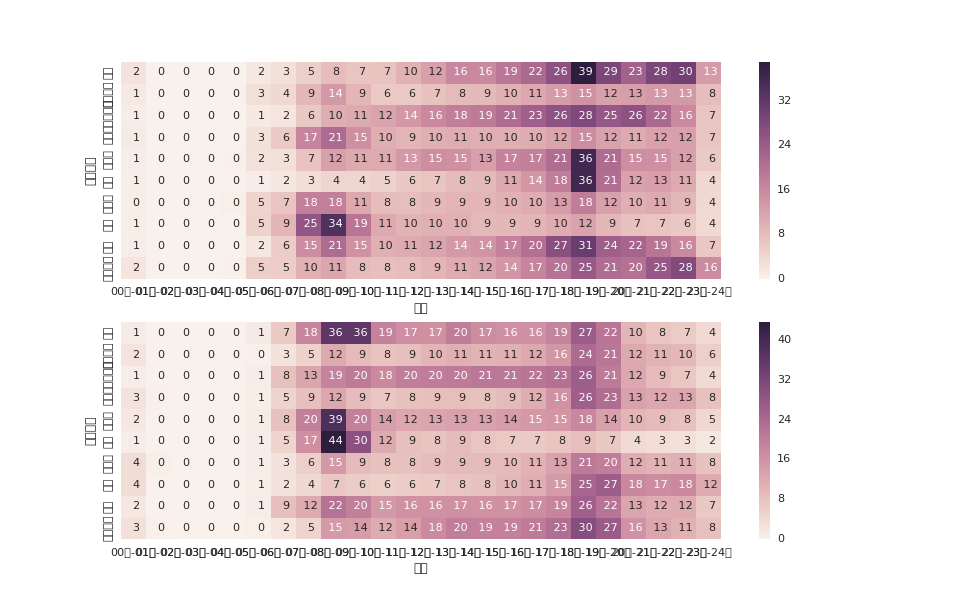

In [66]:
%matplotlib notebook
subplot(2, 1, 1)
sns.heatmap( df2.unstack()/10000,  annot=True, fmt = "3.0f")
subplot(2, 1, 2)
sns.heatmap( df3.unstack()/10000,  annot=True, fmt = "3.0f")

In [33]:
df1.head()

,사용월,호선명,지하철역,value,시각,승하차,Most
0,201511,2호선,종합운동장,15,04시-05시,True,False
1,201511,2호선,삼성,154,04시-05시,True,False
2,201511,2호선,선릉,181,04시-05시,True,True
3,201511,2호선,역삼,94,04시-05시,True,False
4,201511,2호선,강남,326,04시-05시,True,True


In [35]:
df1.sort_values('value').head()


,사용월,호선명,지하철역,value,시각,승하차,Most
532127,201608,2호선,강변,0,03시-04시,False,False
496464,201602,2호선,이대,0,02시-03시,True,False
496465,201602,2호선,아현,0,02시-03시,True,False
496466,201602,2호선,충정로,0,02시-03시,True,False
496467,201602,2호선,용답,0,02시-03시,True,False


In [39]:
df1.sort_values('value').tail()


,사용월,호선명,지하철역,value,시각,승하차,Most
105117,201501,7호선,가산디지털단지,447175,08시-09시,False,False
108157,201603,7호선,가산디지털단지,450419,08시-09시,False,False
100971,201504,7호선,가산디지털단지,455923,08시-09시,False,False
102679,201507,7호선,가산디지털단지,460448,08시-09시,False,False
104824,201503,7호선,가산디지털단지,465406,08시-09시,False,False


<IPython.core.display.Javascript object>


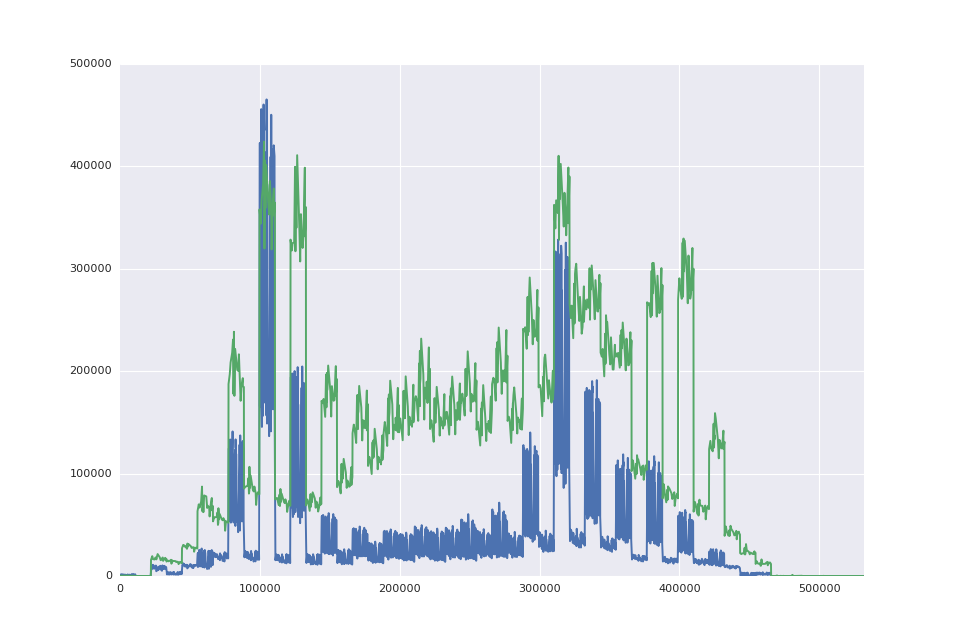

In [57]:
df1[df1['지하철역'] == '가산디지털단지'].value.plot()
df1[df1['지하철역'] == '강남'].value.plot()
xticks=np.arange(len(df1))*5

In [62]:
df1.head()

,사용월,호선명,지하철역,value,시각,승하차,Most
0,201511,2호선,종합운동장,15,04시-05시,True,False
1,201511,2호선,삼성,154,04시-05시,True,False
2,201511,2호선,선릉,181,04시-05시,True,True
3,201511,2호선,역삼,94,04시-05시,True,False
4,201511,2호선,강남,326,04시-05시,True,True


In [63]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [53]:
df1.head()

,사용월,호선명,지하철역,value,시각,승하차,Most
0,201511,2호선,종합운동장,15,04시-05시,True,False
1,201511,2호선,삼성,154,04시-05시,True,False
2,201511,2호선,선릉,181,04시-05시,True,True
3,201511,2호선,역삼,94,04시-05시,True,False
4,201511,2호선,강남,326,04시-05시,True,True


<IPython.core.display.Javascript object>


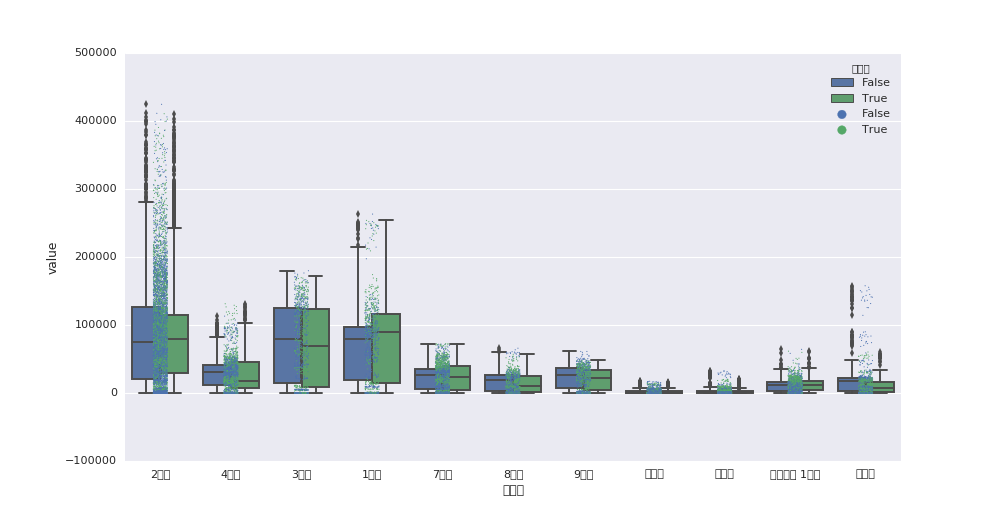

In [63]:
%matplotlib notebook
sns.boxplot(x = "호선명", y = "value", hue="승하차",data = df1[df1['Most']])
sns.stripplot(x="호선명", y="value", hue="승하차", data= df1[df1['Most']],
              jitter=True, size=1, linewidth=0, )

In [65]:
df1[df1['Most']]["호선명"].unique()

array(['2호선', '4호선', '3호선', '1호선', '7호선', '8호선', '9호선', '경부선', '경의선',
       '공항철도 1호선', '분당선'], dtype=object)